## https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# %matplotlib inline

In [8]:
import umap

/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

## Data

In [4]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
print(f"Shape of penguins: {penguins.shape}")

Shape of penguins: (344, 8)


In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
penguins = penguins.dropna()
penguins.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

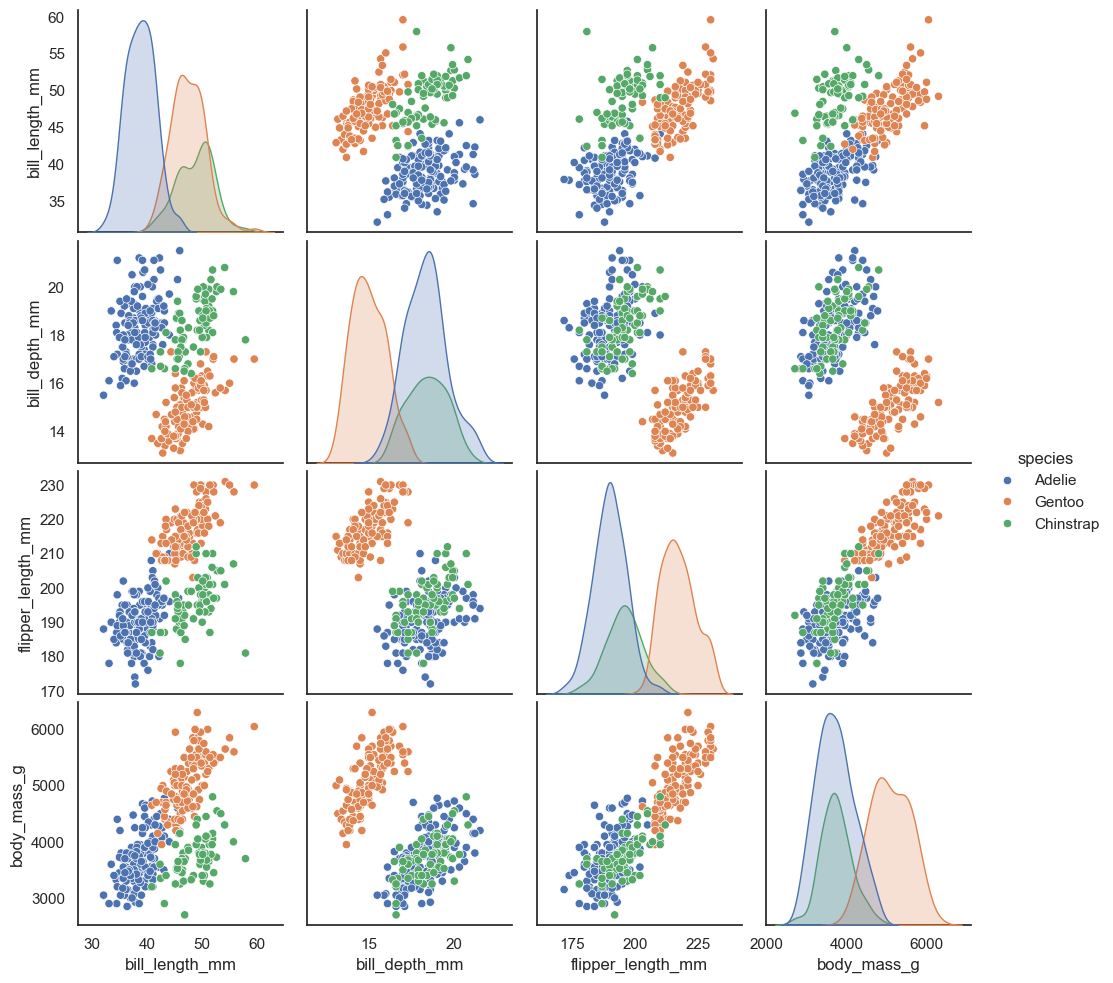

In [7]:
sns.pairplot(penguins.drop("year", axis=1), hue='species');

## Perform dimensionlity reduction using UMAP

In [9]:
reducer = umap.UMAP()

In [10]:
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [11]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(333, 2)

<Axes: >

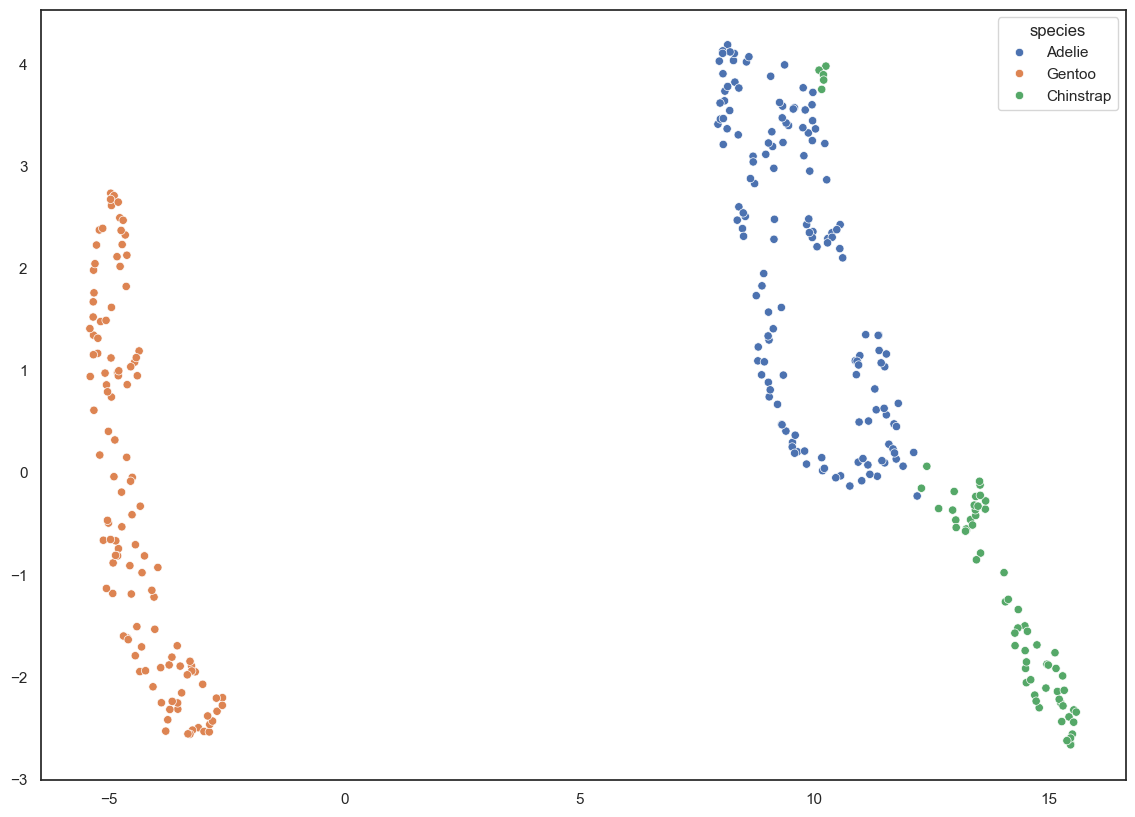

In [13]:
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=penguins["species"])